<a href="https://colab.research.google.com/github/Alexiserges/Heart-disease/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let analyse and visualise the effect that the independent variables biking and smoking 
have on the dependent variable heart disease 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [5]:

df = pd.read_csv('/content/heart.data.csv')
print(df.head())


   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


In [7]:
###Let get to know more about the data
df.describe()

,Unnamed: 0,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000,498.000000
mean,249.500000,37.788411,15.435034,10.174538
std,143.904482,21.481519,8.289959,4.571874
min,1.000000,1.119154,0.525850,0.551898
25%,125.250000,20.204598,8.279776,6.513683
50%,249.500000,35.824459,15.814614,10.385255
75%,373.750000,57.852786,22.568925,13.724024
max,498.000000,74.907111,29.946743,20.453496


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     498 non-null    int64  
 1   biking         498 non-null    float64
 2   smoking        498 non-null    float64
 3   heart.disease  498 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.7 KB


In [11]:
df.shape

(498, 4)

In [12]:
df.isnull().sum()

Unnamed: 0       0
biking           0
smoking          0
heart.disease    0
dtype: int64

In [13]:
##Unnamed data is an unseful column...Then will drop it.
df = df.drop("Unnamed: 0", axis=1)


In [15]:
df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


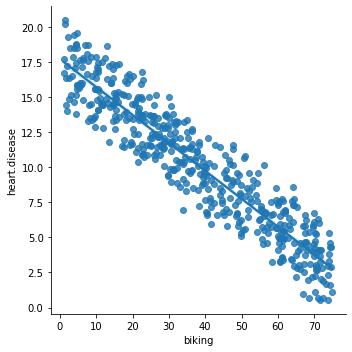

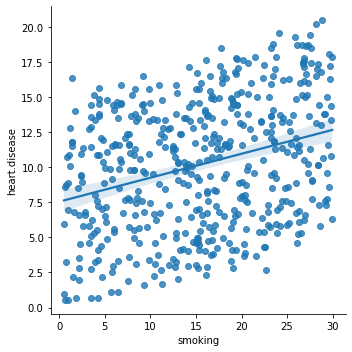

In [18]:
###Let vizualise data set
sns.lmplot(x='biking', y='heart.disease', data=df)  
sns.lmplot(x='smoking', y='heart.disease', data=df)  

Plot above shown that there are more high amount of smoking who may have an heart disease attack. 

In [19]:
###Let find out dependent and independent feautures
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [20]:
x = x_df.to_numpy()
y = y_df.to_numpy()

In [21]:
###Let Split and train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Build the network
#We will be using dim2 because we have only 2 inputs
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu')) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(X_train, y_train ,verbose=1, epochs=1000, 
                    validation_data=(X_test, y_test))

Epoch 1/1000
11/11 [==============================] - 1s 16ms/step - loss: 714.8627 - val_loss: 725.9109
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 661.0062 - val_loss: 669.9827
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 611.4495 - val_loss: 616.5720
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 563.4910 - val_loss: 566.9885
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 519.5255 - val_loss: 520.2440
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 477.6408 - val_loss: 477.0496
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 439.1739 - val_loss: 436.7477
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 403.3258 - val_loss: 399.2524
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 370.2231 - val_loss: 364.3825
Epoch 10/1000
11/11 [==============================] - 0s 4ms/s

Prediction

In [24]:
#Let predict Mean square error between y_test and predicted
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

[ 6.75601546  9.46602604 14.08865401 13.37742996 16.38467802 13.37980742
  7.59179728 10.05580546  6.80839968 12.09848437  7.81638864  9.83547443
  4.94609016  9.77538589  7.70739764 17.05893586  4.29637701  7.98222748
  5.52393102  5.92568029  1.10482036  7.61880347 12.37369096 14.17984416
 11.63207228 13.17374097  6.50794745 10.37232868 13.37300547 11.75315615
  8.55785408 12.04664323 12.92167259 17.17780348  3.29621777  6.51670365
  6.7390807   7.59016604 13.28367033 10.86552244  2.70846056  3.40208038
  8.02740434 10.37756908 11.76942278  8.60827208 15.98937136  7.47437198
 17.87769197  3.68936446  0.98753645  5.07228124  6.95950199 15.19818432
  9.74718577  6.71507793  7.93060122 11.29439158 13.01604512  4.07682347
  7.3303757   7.04062107 13.47050633  5.56092164 11.10563057 12.81263706
 16.16479395  5.68568185 17.47394032  9.23007425  4.70700936  3.74449837
 18.68979793 16.19911804  3.10933775  9.51338391 13.28152871  6.73577092
 11.1407355   8.86792508 19.43196008  6.91625864 14

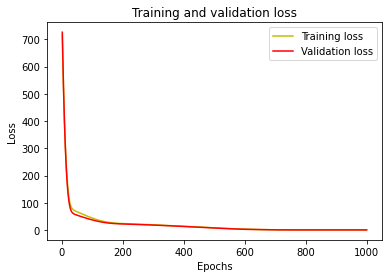

In [25]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on the above epoch training, we can observe that Training loss and Validation loss tend to have curve.

In [33]:
x0 = 17.26923335
x1 = 2.21956

In [34]:
hidden0 = max(0, ((x0*-0.08574138)+(x1*0.163013786)+(4.4128947)))
hidden1 = max(0, ((x0*-0.0595318)+(x1*-0.0158433)+(4.514626)))

In [35]:

output = max(0, ((hidden0*1.4296)+(hidden1*1.14677)+(2.504947)))
print(output)

11.172039258807258
